# Libraries 

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve


%matplotlib inline

# Decision Tree Pipeline

In [2]:

class decisiontree_pipeline:
    
    def __init__(self,filename):
        self.df_ecommerce_dataset = pd.read_csv(filename)
        

    def data_preprocessing(self,axis=1):
        
        #load data and check for missing values
        print(f'Missing Value Present? : {self.df_ecommerce_dataset.isna().any().any()}')
        
        #divide data into features and labels
        self.label = self.df_ecommerce_dataset.Revenue
        self.df_features  = self.df_ecommerce_dataset.drop(['Revenue',],axis=axis)
        
        #Hot encode categorical features
        self.enc = preprocessing.OneHotEncoder()
        self.features  = self.enc.fit_transform(self.df_features)
        
        self.df_features.drop(['Month','VisitorType','Weekend'],axis=axis,inplace=True)
        
        #standardize feature dataframe
        scaler = StandardScaler()
        self.features_scaled = scaler.fit_transform(self.df_features)
        self.features_scaled = pd.DataFrame(self.features_scaled, columns = self.df_features.columns)
        
        #Dimension reduction to select features that account for 95% of variance in dataset
        self.pca_95 = PCA(n_components=0.95,random_state=0)
        self.pca_95.fit(self.features_scaled)
        self.X_pca_95 = self.pca_95.transform(self.features_scaled)
        self.df_classification = pd.DataFrame(self.X_pca_95)
        self.df_classification.head()
        
        #return self.df_classification 
    
    def train_model(self,test_size=0.3,random_state=0):
        
        #Split dataset in 70 30% ratio
        self.X_train,self.X_test,self.y_train,self.y_test = train_test_split(self.df_classification,self.label,
                                                            test_size=test_size,
                                                             random_state = random_state)
        
        #Define and fit model
        self.model = DecisionTreeClassifier(criterion='gini',random_state=random_state,
                                            max_depth=3, min_samples_leaf=2) 
        self.model.fit(self.X_train,self.y_train)
    
        
    def eval_model(self):
    
        #prediction
        y_pred = self.model.predict(self.X_test)
        print(f'Classification Report:\n {classification_report(self.y_test,y_pred)}')
        
        #plot confusion matrix
        plot_confusion_matrix(self.model,self.X_test,self.y_test,cmap='cividis')
        plt.show()
        
    def optimise_model(self):
        
        print('Optimised Model : ')
        self.optimised_model = DecisionTreeClassifier(criterion='gini',random_state=0, max_depth=4, \
                               min_samples_leaf=15,min_samples_split=15,max_features=3,class_weight={0:1,1:6}) 
        self.optimised_model.fit(self.X_train,self.y_train)
        
    def eval_model2(self):
              
        #prediction
        y_pred = self.optimised_model.predict(self.X_test)
        print(f'Classification Report:\n {classification_report(self.y_test,y_pred)}')
        
        #plot confusion matrix
        plot_confusion_matrix(self.optimised_model,self.X_test,self.y_test,cmap='cividis')
        plot_roc_curve(self.model,self.X_test,self.y_test)
        plt.show()
        
    def crossvalidate(self):
        val_score = cross_val_score(DecisionTreeClassifier(criterion='gini',random_state=0, max_depth=4,
                                                           min_samples_leaf=15,min_samples_split=15,
                                                           max_features=3,),
                                                           self.features,self.label,cv=5 )
        
        print(f'The 5 fold cross validation score: {val_score}')
        

## Instantiating Decision Tree Pipeline

Missing Value Present? : False
Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.99      0.92      3077
        True       0.87      0.18      0.30       622

    accuracy                           0.86      3699
   macro avg       0.86      0.59      0.61      3699
weighted avg       0.86      0.86      0.82      3699



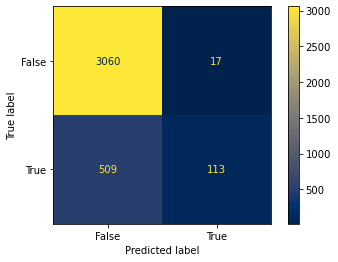

Optimised Model : 
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.84      0.88      3077
        True       0.44      0.60      0.50       622

    accuracy                           0.80      3699
   macro avg       0.67      0.72      0.69      3699
weighted avg       0.83      0.80      0.81      3699



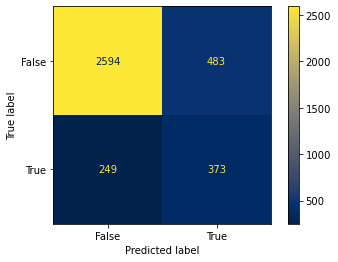

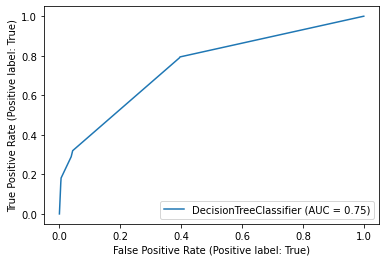

The 5 fold cross validation score: [0.84549878 0.84549878 0.84509327 0.84509327 0.84509327]


In [3]:
clf_dt = decisiontree_pipeline('online_shoppers_intention.csv')
clf_dt.data_preprocessing()
clf_dt.train_model()
clf_dt.eval_model()
clf_dt.optimise_model()
clf_dt.eval_model2()
clf_dt.crossvalidate()

# Support Vector Machine Pipeline

In [4]:
class svm_pipeline:
    
    def __init__(self,filename):
        self.df_ecommerce_dataset = pd.read_csv(filename)
        

    def data_preprocessing(self,axis=1):
        
        #load data and check for missing values
        print(f'Missing Value Present? : {self.df_ecommerce_dataset.isna().any().any()}')
        
        #divide data into features and labels
        self.label = self.df_ecommerce_dataset.Revenue
        self.df_features  = self.df_ecommerce_dataset.drop(['Revenue',],axis=axis)
        
        #Hot encode categorical features
        self.enc = preprocessing.OneHotEncoder()
        self.features  = self.enc.fit_transform(self.df_features)
        
        self.df_features.drop(['Month','VisitorType','Weekend'],axis=axis,inplace=True)
        
        #standardize feature dataframe
        scaler = StandardScaler()
        self.features_scaled = scaler.fit_transform(self.df_features)
        self.features_scaled = pd.DataFrame(self.features_scaled, columns = self.df_features.columns)
        
        #Dimension reduction to select features that account for 95% of variance in dataset
        self.pca_95 = PCA(n_components=0.95,random_state=0)
        self.pca_95.fit(self.features_scaled)
        self.X_pca_95 = self.pca_95.transform(self.features_scaled)
        self.df_classification = pd.DataFrame(self.X_pca_95)
        self.df_classification.head()
        
        #return self.df_classification 
    
    def train_model(self,test_size=0.3,random_state=0):
        
        #Split dataset in 70 30% ratio
        self.X_train,self.X_test,self.y_train,self.y_test = train_test_split(self.df_classification,self.label,
                                                            test_size=test_size,
                                                             random_state = random_state)
        
        #Define and fit model
        self.model = SVC() 
        self.model.fit(self.X_train,self.y_train)
    
        
    def eval_model(self):
    
        #prediction
        y_pred = self.model.predict(self.X_test)
        print(f'Classification Report:\n {classification_report(self.y_test,y_pred)}')
        
        #plot confusion matrix
        plot_confusion_matrix(self.model,self.X_test,self.y_test,cmap='cividis')
        plt.show()
        
    def optimise_model(self):
        
        print('Optimised Model : ')
        self.optimised_model = SVC(C=1,kernel='linear',class_weight={1:6})
        self.optimised_model.fit(self.X_train,self.y_train)
        
    def eval_model2(self):
              
        #prediction
        y_pred = self.optimised_model.predict(self.X_test)
        print(f'Classification Report:\n {classification_report(self.y_test,y_pred)}')
        
        #plot confusion matrix
        plot_confusion_matrix(self.optimised_model,self.X_test,self.y_test,cmap='cividis')
        plot_roc_curve(self.model,self.X_test,self.y_test)
        plt.show()
        
    def crossvalidate(self):
        val_score = cross_val_score(SVC(C=1,kernel='linear',class_weight={1:6},gamma='auto'),
                                    self.features,self.label,cv=5 )
        
        print(f'The 5 fold cross validation score: {val_score}')

 ## Instantiating Support Vector Machine Pipeline

Missing Value Present? : False
Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.97      0.93      3077
        True       0.74      0.47      0.58       622

    accuracy                           0.88      3699
   macro avg       0.82      0.72      0.75      3699
weighted avg       0.87      0.88      0.87      3699



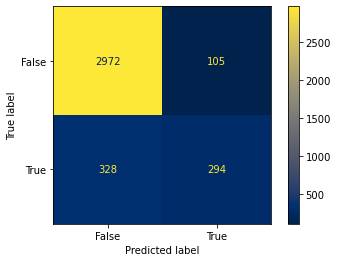

Optimised Model : 
Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.90      0.92      3077
        True       0.58      0.73      0.65       622

    accuracy                           0.87      3699
   macro avg       0.76      0.81      0.78      3699
weighted avg       0.88      0.87      0.87      3699



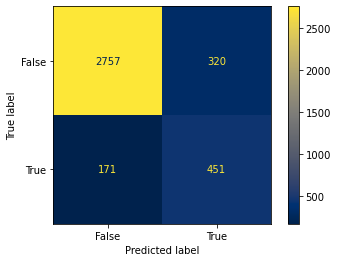

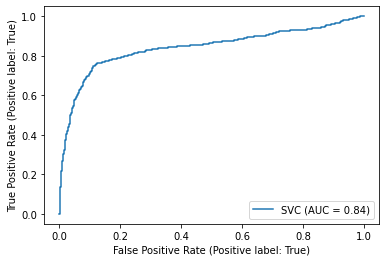

The 5 fold cross validation score: [0.88361719 0.88280616 0.84793187 0.85928629 0.85604217]


In [5]:
clf_svm = svm_pipeline('online_shoppers_intention.csv')
clf_svm.data_preprocessing()
clf_svm.train_model()
clf_svm.eval_model()
clf_svm.optimise_model()
clf_svm.eval_model2()
clf_svm.crossvalidate()

# AdaBoost Learning Algorithm

In [10]:
class adaboost_pipeline:
    
    def __init__(self,filename):
        self.df_ecommerce_dataset = pd.read_csv(filename)
        

    def data_preprocessing(self,axis=1):
        
        #load data and check for missing values
        print(f'Missing Value Present? : {self.df_ecommerce_dataset.isna().any().any()}')
        
        #divide data into features and labels
        self.label = self.df_ecommerce_dataset.Revenue
        self.df_features  = self.df_ecommerce_dataset.drop(['Revenue',],axis=axis)
        
        #Hot encode categorical features
        self.enc = preprocessing.OneHotEncoder()
        self.features  = self.enc.fit_transform(self.df_features)
        
        self.df_features.drop(['Month','VisitorType','Weekend'],axis=axis,inplace=True)
        
        #standardize feature dataframe
        scaler = StandardScaler()
        self.features_scaled = scaler.fit_transform(self.df_features)
        self.features_scaled = pd.DataFrame(self.features_scaled, columns = self.df_features.columns)
        
        #Dimension reduction to select features that account for 95% of variance in dataset
        self.pca_95 = PCA(n_components=0.95,random_state=0)
        self.pca_95.fit(self.features_scaled)
        self.X_pca_95 = self.pca_95.transform(self.features_scaled)
        self.df_classification = pd.DataFrame(self.X_pca_95)
        self.df_classification.head()
        
        #return self.df_classification 
    
    def train_model(self,test_size=0.3,random_state=0):
        
        #Split dataset in 70 30% ratio
        self.X_train,self.X_test,self.y_train,self.y_test = train_test_split(self.df_classification,self.label,
                                                            test_size=test_size,
                                                             random_state = random_state)
        
        #Define and fit model
        self.model =  AdaBoostClassifier(n_estimators=200, random_state=0) 
        self.model.fit(self.X_train,self.y_train)
    
        
    def eval_model(self):
    
        #prediction
        y_pred = self.model.predict(self.X_test)
        print(f'Classification Report:\n {classification_report(self.y_test,y_pred)}')
        
        #plot confusion matrix
        plot_confusion_matrix(self.model,self.X_test,self.y_test,cmap='cividis')
        plt.show()
        
    def optimise_model(self):
        
        print('Optimised Model')
        self.dt  = DecisionTreeClassifier(max_depth=4,max_features=3,random_state=0,class_weight={1:5})
        self.optimised_model = AdaBoostClassifier(n_estimators=200,learning_rate=0.001,
                                                  base_estimator = self.dt, random_state=0)
        self.optimised_model.fit(self.X_train,self.y_train)
        
    def eval_model2(self):
              
        #prediction
        y_pred = self.optimised_model.predict(self.X_test)
        print(f'Classification Report:\n {classification_report(self.y_test,y_pred)}')
        
        #plot confusion matrix
        plot_confusion_matrix(self.optimised_model,self.X_test,self.y_test,cmap='cividis')
        plot_roc_curve(self.model,self.X_test,self.y_test)
        plt.show()
        
    def crossvalidate(self):
        val_score = cross_val_score(AdaBoostClassifier(n_estimators=200,learning_rate=0.001,
                                    base_estimator = self.dt, random_state=0),self.features,
                                    self.label,cv=5)
        
        print(f'The 5 fold cross validation score: {val_score}')

 ## Instantiating Adaboost Pipeline

Missing Value Present? : False
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.97      0.93      3077
        True       0.72      0.39      0.51       622

    accuracy                           0.87      3699
   macro avg       0.80      0.68      0.72      3699
weighted avg       0.86      0.87      0.86      3699



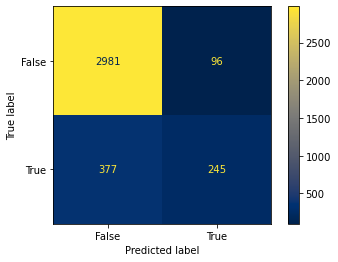

Optimised Model
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.88      0.90      3077
        True       0.50      0.61      0.55       622

    accuracy                           0.83      3699
   macro avg       0.71      0.75      0.73      3699
weighted avg       0.85      0.83      0.84      3699



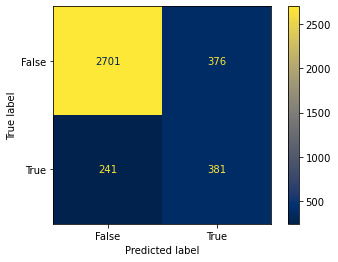

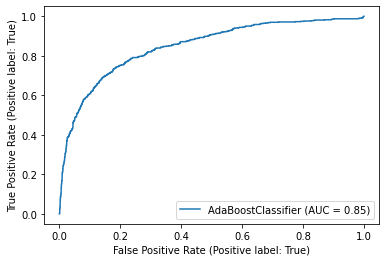

The 5 fold cross validation score: [0.84387672 0.84225466 0.83860503 0.8406326  0.84225466]


In [11]:
clf_abt = adaboost_pipeline('online_shoppers_intention.csv')
clf_abt.data_preprocessing()
clf_abt.train_model()
clf_abt.eval_model()
clf_abt.optimise_model()
clf_abt.eval_model2()
clf_abt.crossvalidate()